In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,533 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,956 kB]
Fetched 4,746 kB in 3s (1,674 kB/s)
Reading package lists... Done
W: Skipping acquire of configur

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

In [3]:
!wget https://archive.apache.org/dist/hadoop/core/hadoop-2.7.7/hadoop-2.7.7.tar.gz
!tar -xvzf hadoop-2.7.7.tar.gz
!mv hadoop-2.7.7 hadoop

Streaming output truncated to the last 5000 lines.
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-html/org/apache/hadoop/lib/service/FileSystemAccessException.html
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-html/org/apache/hadoop/lib/service/instrumentation/
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-html/org/apache/hadoop/lib/service/instrumentation/InstrumentationService.html
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-html/org/apache/hadoop/lib/service/hadoop/
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-html/org/apache/hadoop/lib/service/hadoop/FileSystemAccessService.html
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-html/org/apache/hadoop/lib/service/FileSystemAccessException.ERROR.html
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-html/org/apache/hadoop/lib/service/FileSystemAccess.FileSystemExecutor.html
hadoop-2.7.7/share/doc/hadoop/hadoop-hdfs-httpfs/apidocs/src-ht

In [4]:
# Configure Hadoop
os.environ["HADOOP_HOME"] = "/content/hadoop"
os.environ["PATH"] += ":/content/hadoop/bin"

In [5]:
# Write core-site.xml using Python file handling
core_site_config = """
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>file:///</value>
  </property>
</configuration>
"""

with open("/content/hadoop/etc/hadoop/core-site.xml", "w") as file:
    file.write(core_site_config)

In [6]:
core_site_config = """<?xml version="1.0"?>
<configuration>
    <property>
        <name>fs.defaultFS</name>
        <value>hdfs://localhost:9000</value>
    </property>
</configuration>
"""

with open("/content/hadoop/etc/hadoop/core-site.xml", "w") as f:
    f.write(core_site_config)


In [7]:
hdfs_site_config = """<?xml version="1.0"?>
<configuration>
    <property>
        <name>dfs.namenode.rpc-address</name>
        <value>localhost:9000</value>
    </property>
    <property>
        <name>dfs.namenode.servicerpc-address</name>
        <value>localhost:9001</value>
    </property>
    <property>
        <name>dfs.namenode.secondary.http-address</name>
        <value>localhost:50090</value>
    </property>
</configuration>
"""

with open("/content/hadoop/etc/hadoop/hdfs-site.xml", "w") as f:
    f.write(hdfs_site_config)


In [8]:
!hdfs namenode -format

25/03/01 11:54:23 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = e81e9e5241f0/172.28.0.12
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 2.7.7
STARTUP_MSG:   classpath = /content/hadoop/etc/hadoop:/content/hadoop/share/hadoop/common/lib/stax-api-1.0-2.jar:/content/hadoop/share/hadoop/common/lib/paranamer-2.3.jar:/content/hadoop/share/hadoop/common/lib/jets3t-0.9.0.jar:/content/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/content/hadoop/share/hadoop/common/lib/jersey-server-1.9.jar:/content/hadoop/share/hadoop/common/lib/commons-logging-1.1.3.jar:/content/hadoop/share/hadoop/common/lib/jersey-json-1.9.jar:/content/hadoop/share/hadoop/common/lib/jackson-mapper-asl-1.9.13.jar:/content/hadoop/share/hadoop/common/lib/commons-httpclient-3.1.jar:/content/hadoop/share/hadoop/common/lib/avro-1.7.4.jar:/content/hadoop/share/hadoop/common/lib/jsp-api-2.1.jar:/content/hado

In [9]:
!hdfs datanode -format

25/03/01 11:54:36 INFO datanode.DataNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting DataNode
STARTUP_MSG:   host = e81e9e5241f0/172.28.0.12
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 2.7.7
STARTUP_MSG:   classpath = /content/hadoop/etc/hadoop:/content/hadoop/share/hadoop/common/lib/stax-api-1.0-2.jar:/content/hadoop/share/hadoop/common/lib/paranamer-2.3.jar:/content/hadoop/share/hadoop/common/lib/jets3t-0.9.0.jar:/content/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/content/hadoop/share/hadoop/common/lib/jersey-server-1.9.jar:/content/hadoop/share/hadoop/common/lib/commons-logging-1.1.3.jar:/content/hadoop/share/hadoop/common/lib/jersey-json-1.9.jar:/content/hadoop/share/hadoop/common/lib/jackson-mapper-asl-1.9.13.jar:/content/hadoop/share/hadoop/common/lib/commons-httpclient-3.1.jar:/content/hadoop/share/hadoop/common/lib/avro-1.7.4.jar:/content/hadoop/share/hadoop/common/lib/jsp-api-2.1.jar:/content/hado

In [10]:
!hadoop version

Hadoop 2.7.7
Subversion Unknown -r c1aad84bd27cd79c3d1a7dd58202a8c3ee1ed3ac
Compiled by stevel on 2018-07-18T22:47Z
Compiled with protoc 2.5.0
From source with checksum 792e15d20b12c74bd6f19a1fb886490
This command was run using /content/hadoop/share/hadoop/common/hadoop-common-2.7.7.jar


In [11]:
!ls /content/hadoop/etc/hadoop/

capacity-scheduler.xml	    httpfs-env.sh	     mapred-env.sh
configuration.xsl	    httpfs-log4j.properties  mapred-queues.xml.template
container-executor.cfg	    httpfs-signature.secret  mapred-site.xml.template
core-site.xml		    httpfs-site.xml	     slaves
hadoop-env.cmd		    kms-acls.xml	     ssl-client.xml.example
hadoop-env.sh		    kms-env.sh		     ssl-server.xml.example
hadoop-metrics2.properties  kms-log4j.properties     yarn-env.cmd
hadoop-metrics.properties   kms-site.xml	     yarn-env.sh
hadoop-policy.xml	    log4j.properties	     yarn-site.xml
hdfs-site.xml		    mapred-env.cmd


In [12]:
!sed -i 's/^export HADOOP_SSH_OPTS/#export HADOOP_SSH_OPTS/' /content/hadoop/etc/hadoop/hadoop-env.sh

In [13]:
!nohup hdfs namenode &
!nohup hdfs datanode &

nohup: appending output to 'nohup.out'
nohup: appending output to 'nohup.out'


In [14]:
!nohup yarn resourcemanager &
!nohup yarn nodemanager &

nohup: appending output to 'nohup.out'
nohup: appending output to 'nohup.out'


#Sample Code to test HDFS

In [15]:
!hdfs dfs -mkdir /test
!hdfs dfs -ls /

mkdir: `/test': File exists
Found 5 items
drwxr-xr-x   - root supergroup          0 2025-03-01 08:04 /input
drwxr-xr-x   - root supergroup          0 2025-03-01 08:04 /output
-rw-r--r--   3 root supergroup         14 2025-03-01 08:04 /sample.txt
drwxr-xr-x   - root supergroup          0 2025-03-01 10:13 /test
drwxr-xr-x   - root supergroup          0 2025-03-01 08:05 /user


In [16]:
!echo "Hello Hadoop!" > sample.txt
!hdfs dfs -put sample.txt /
!hdfs dfs -ls /

put: `/sample.txt': File exists
Found 5 items
drwxr-xr-x   - root supergroup          0 2025-03-01 08:04 /input
drwxr-xr-x   - root supergroup          0 2025-03-01 08:04 /output
-rw-r--r--   3 root supergroup         14 2025-03-01 08:04 /sample.txt
drwxr-xr-x   - root supergroup          0 2025-03-01 10:13 /test
drwxr-xr-x   - root supergroup          0 2025-03-01 08:05 /user


In [17]:
!hdfs dfs -cat /sample.txt

Hello Hadoop!


In [18]:
%%writefile mapper.py
import sys

# Open stdin with the correct encoding
for line in sys.stdin.buffer:
    try:
        line = line.decode("utf-8")  # Decode using UTF-8
    except UnicodeDecodeError:
        line = line.decode("latin-1")  # Fallback to Latin-1 encoding

    print(line.strip())  # Process and output



Overwriting mapper.py


In [19]:
%%writefile reducer.py
import sys

current_key = None
current_sum = 0

# Read input line by line from stdin
for line in sys.stdin:
    try:
        # Decode if needed (not required in most cases for stdin)
        line = line.strip()
        key, value = line.split("\t")  # Expecting tab-separated key-value pairs
        value = int(value)  # Convert value to integer

        # If key changes, print the previous key and sum
        if current_key and key != current_key:
            print(f"{current_key}\t{current_sum}")
            current_sum = 0  # Reset sum for the new key

        current_key = key
        current_sum += value  # Aggregate values

    except ValueError:
        # Ignore lines with incorrect formatting
        continue

# Print the last key and sum
if current_key:
    print(f"{current_key}\t{current_sum}")



Overwriting reducer.py


In [20]:
!chmod +x mapper.py reducer.py

In [21]:
%%writefile input.txt
1,Math,85
2,Science,90
3,Math,78
4,Science,88
5,English,92

Overwriting input.txt


In [22]:
!hdfs dfs -mkdir -p /input
!hdfs dfs -put input.txt /input

put: `/input/input.txt': File exists


In [23]:
!ls /content/hadoop/share/hadoop/tools/lib/ | grep hadoop-streaming


hadoop-streaming-2.7.7.jar


In [25]:
!jps

1667 DataNode
1685 ResourceManager
67896 Jps
1646 NameNode
1694 NodeManager


In [26]:
!hdfs dfs -cat /output/part-00000

cat: `/output/part-00000': No such file or directory


In [27]:
!cat /content/hadoop/etc/hadoop/core-site.xml
!cat /content/hadoop/etc/hadoop/hdfs-site.xml

<?xml version="1.0"?>
<configuration>
    <property>
        <name>fs.defaultFS</name>
        <value>hdfs://localhost:9000</value>
    </property>
</configuration>
<?xml version="1.0"?>
<configuration>
    <property>
        <name>dfs.namenode.rpc-address</name>
        <value>localhost:9000</value>
    </property>
    <property>
        <name>dfs.namenode.servicerpc-address</name>
        <value>localhost:9001</value>
    </property>
    <property>
        <name>dfs.namenode.secondary.http-address</name>
        <value>localhost:50090</value>
    </property>
</configuration>


In [28]:
!whoami

root


In [29]:
%%writefile mapper.py
import sys

for line in sys.stdin.buffer:  # Read as binary
    try:
        line = line.decode("utf-8")  # Decode as UTF-8
        print(line.strip())  # Process line
    except UnicodeDecodeError:
        continue  # Skip problematic lines



Overwriting mapper.py


In [30]:
%%writefile reducer.py
#!/usr/bin/env python3
import sys

current_student = None
total_marks = 0
count = 0

for line in sys.stdin:
    student, marks = line.strip().split("\t")
    marks = int(marks)

    if student != current_student:
        if current_student:
            print(f"{current_student}\t{total_marks / count}")  # Print average marks
        current_student = student
        total_marks = 0
        count = 0

    total_marks += marks
    count += 1

if current_student:
    print(f"{current_student}\t{total_marks / count}")


Overwriting reducer.py


In [31]:
!chmod +x mapper.py reducer.py

In [32]:
%%writefile input.txt
StudentID,Subject,Marks
101,Math,80
102,Science,90
101,Science,85
103,Math,70
102,Math,95

Overwriting input.txt


In [33]:
!hadoop/bin/hdfs dfs -mkdir -p /user/root
!hadoop/bin/hdfs dfs -put input.txt /user/root/

put: `/user/root/input.txt': File exists


In [35]:
!pip install pyspark sqlalchemy pymysql matplotlib seaborn

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, max, min, count
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

+---------+-----------+-----------+--------+------------+-----------+---+--------------------+
|StudentID|Electronics|Programming|Database|Data Science|Mathematics|DSA|                Name|
+---------+-----------+-----------+--------+------------+-----------+---+--------------------+
|        1|         31|         97|      77|          89|         71| 82|     Avni Srivastava|
|        2|         86|         88|      64|          97|         39| 63|          Rajat Bose|
|        3|         73|         96|      94|          57|         45| 42| Siddharth Chaudhary|
|        4|         40|         46|      73|          83|         36| 80|         Sneha Menon|
|        5|         43|         96|      81|          69|         44| 52|       Anjali Tiwari|
|        6|         90|         69|      66|          73|         55| 58|       Sakshi Kapoor|
|        7|         60|         93|      69|          69|         38| 85|       Megha Nambiar|
|        8|         75|         49|      78|      

<ipython-input-36-1e64c86daaad>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Subject", y="Average_Marks", data=stats_pd, palette="viridis")


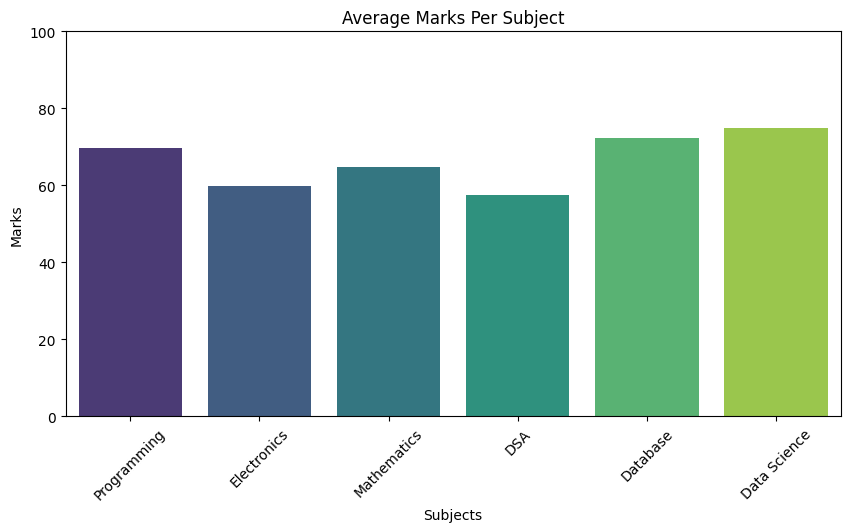

<ipython-input-36-1e64c86daaad>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="coolwarm")


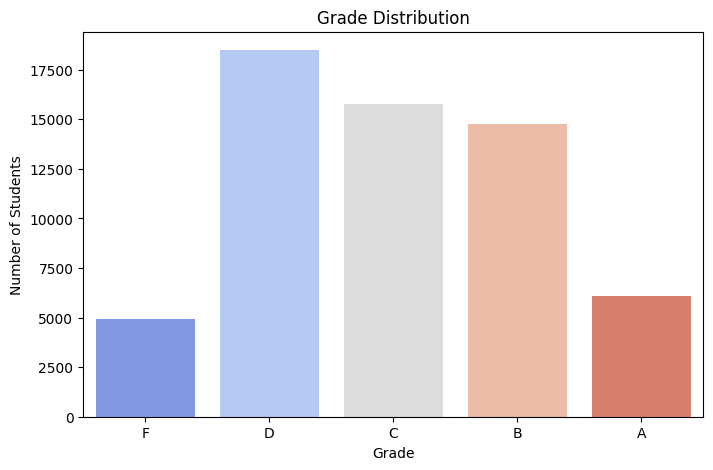

Dashboard Generated with Statistics!


In [36]:

# ✅ Initialize Spark Session with HDFS Support
spark = SparkSession.builder \
    .appName("ResultManagementSystem") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .getOrCreate()

# Generate 10,000 Students with Random Names
first_names = [
    "Aarav", "Vivaan", "Aditya", "Arjun", "Karan", "Rohan", "Ananya", "Ishita", "Tanvi", "Neha",
    "Rahul", "Siddharth", "Nikhil", "Harsh", "Pranav", "Manish", "Suresh", "Vikas", "Piyush", "Rajat",
    "Priya", "Sanya", "Kriti", "Riya", "Deepika", "Poonam", "Swati", "Megha", "Sneha", "Anjali",
    "Gautam", "Keshav", "Varun", "Rajeev", "Himanshu", "Alok", "Sakshi", "Pallavi", "Sonali", "Harini",
    "Amit", "Dev", "Rishi", "Ira", "Jaya", "Naina", "Kabir", "Aryan", "Simran", "Meera",
    "Yash", "Aradhya", "Dhruv", "Advait", "Tara", "Anvi", "Veer", "Samar", "Diya", "Avni",
    "Om", "Lakshay", "Ishan", "Reyansh", "Esha", "Mihir", "Harini", "Kavya", "Rudra", "Shanaya"
] * 250

last_names = [
    "Sharma", "Verma", "Iyer", "Menon", "Bhatia", "Reddy", "Patel", "Kapoor", "Chopra", "Das",
    "Mishra", "Dubey", "Chaudhary", "Malhotra", "Srivastava", "Tiwari", "Jain", "Saxena", "Joshi", "Gupta",
    "Mehta", "Rana", "Singhania", "Bansal", "Goel", "Garg", "Bose", "Roy", "Banerjee", "Mukherjee",
    "Nayak", "Venkatesh", "Kulkarni", "Purohit", "Shukla", "Bhattacharya", "Sengupta", "Chatterjee", "Deshmukh", "Naik",
    "Tripathi", "Nambiar", "Joshi", "Awasthi", "Chakraborty", "Gokhale", "Pathak", "Mahajan", "Thakur", "Pillai"
] * 250

students = [(i, f"{random.choice(first_names)} {random.choice(last_names)}") for i in range(1, 10001)]
students_df = spark.createDataFrame(students, ["StudentID", "Name"])

# Subjects
subjects = ["Electronics", "Programming", "Database", "Data Science", "Mathematics", "DSA"]
subject_difficulty = {
    "Programming": (40, 100),
    "Electronics": (30, 90),
    "Mathematics": (35, 95),
    "DSA": (30, 85),
    "Database": (45, 100),
    "Data Science": (50, 100)
}

# Generate Marks
marks = [(s[0], sub, random.randint(*subject_difficulty[sub])) for s in students for sub in subjects]
marks_df = spark.createDataFrame(marks, ["StudentID", "Subject", "Marks"])

# Pivot DataFrame for better readability
all_df = marks_df.groupBy("StudentID").pivot("Subject", subjects).agg(max("Marks"))
all_df = all_df.join(students_df, "StudentID").orderBy("StudentID")

# Display Results
all_df.show(1000)

# 🚀 Save to HDFS
all_df.write.mode("overwrite").csv("hdfs://localhost:9000/user/root/all_data")

# Statistical Analysis
stats_df = marks_df.groupBy("Subject").agg(
    avg("Marks").alias("Average_Marks"),
    max("Marks").alias("Max_Marks"),
    min("Marks").alias("Min_Marks")
)

# Save Stats to HDFS
stats_df.write.mode("overwrite").csv("hdfs://localhost:9000/user/root/stats_data")

# Convert to Pandas for Visualization
stats_pd = stats_df.toPandas()
marks_pd = marks_df.toPandas()

# Plot Average Marks Per Subject
plt.figure(figsize=(10,5))
sns.barplot(x="Subject", y="Average_Marks", data=stats_pd, palette="viridis")
plt.title("Average Marks Per Subject")
plt.xticks(rotation=45)
plt.ylabel("Marks")
plt.xlabel("Subjects")
plt.ylim(0, 100)  # Adjusted to show all marks
plt.show()

# Grade Distribution
bins = [0, 40, 60, 75, 90, 100]
labels = ["F", "D", "C", "B", "A"]
marks_pd["Grade"] = pd.cut(marks_pd["Marks"], bins=bins, labels=labels)
grade_counts = marks_pd["Grade"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="coolwarm")
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

print("Dashboard Generated with Statistics!")

# 🚀 Save Marks Data to HDFS
marks_df.write.mode("overwrite").orc("hdfs://localhost:9000/user/root/marks_data")


In [43]:
!hdfs dfs -rm -r /user/root/output

25/03/01 11:58:19 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /user/root/output


In [44]:
!hadoop jar /content/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.7.jar \
  -mapper "python3 mapper.py" \
  -reducer "python3 reducer.py" \
  -input /user/root/marks_data \
  -output /user/root/output


25/03/01 11:58:24 INFO Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id
25/03/01 11:58:24 INFO jvm.JvmMetrics: Initializing JVM Metrics with processName=JobTracker, sessionId=
25/03/01 11:58:24 INFO jvm.JvmMetrics: Cannot initialize JVM Metrics with processName=JobTracker, sessionId= - already initialized
25/03/01 11:58:24 INFO mapred.FileInputFormat: Total input paths to process : 2
25/03/01 11:58:24 INFO mapreduce.JobSubmitter: number of splits:2
25/03/01 11:58:24 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local362227920_0001
25/03/01 11:58:25 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
25/03/01 11:58:25 INFO mapreduce.Job: Running job: job_local362227920_0001
25/03/01 11:58:25 INFO mapred.LocalJobRunner: OutputCommitter set in config null
25/03/01 11:58:25 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapred.FileOutputCommitter
25/03/01 11:58:25 INFO output.FileOutputCommitter: File 

In [45]:
!hdfs dfs -ls /user/root/marks_data


Found 3 items
-rw-r--r--   3 root supergroup          0 2025-03-01 11:56 /user/root/marks_data/_SUCCESS
-rw-r--r--   3 root supergroup      46026 2025-03-01 11:56 /user/root/marks_data/part-00000-167e6f08-3b1c-4dc8-b4b3-db7c1cd6623a-c000.snappy.orc
-rw-r--r--   3 root supergroup      47155 2025-03-01 11:56 /user/root/marks_data/part-00001-167e6f08-3b1c-4dc8-b4b3-db7c1cd6623a-c000.snappy.orc


In [46]:
!iconv -f ISO-8859-1 -t UTF-8 input.txt -o output_file

In [47]:
!pwd

/content


In [49]:
# !hadoop jar /content/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.7.jar \
#     -input hdfs://localhost:9000/user/root/marks_data \
#     -output hdfs://localhost:9000/user/root/avg_marks_output \
#     -mapper mapper.py -reducer reducer.py


In [52]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Start Spark Session
spark = SparkSession.builder.appName("ORC Reader").getOrCreate()
df = spark.read.orc("/user/root/marks_data/part-*")
df = df.withColumn("StudentID", col("StudentID").cast("int"))
df_pivoted = df.groupBy("StudentID").pivot("Subject").agg({"Marks": "max"})
df_pivoted = df_pivoted.orderBy(col("StudentID").asc())
df_pivoted.show(1000, truncate=False)



+---------+---+------------+--------+-----------+-----------+-----------+
|StudentID|DSA|Data Science|Database|Electronics|Mathematics|Programming|
+---------+---+------------+--------+-----------+-----------+-----------+
|1        |82 |89          |77      |31         |71         |97         |
|2        |63 |97          |64      |86         |39         |88         |
|3        |42 |57          |94      |73         |45         |96         |
|4        |80 |83          |73      |40         |36         |46         |
|5        |52 |69          |81      |43         |44         |96         |
|6        |58 |73          |66      |90         |55         |69         |
|7        |85 |69          |69      |60         |38         |93         |
|8        |46 |97          |78      |75         |68         |49         |
|9        |70 |50          |61      |38         |81         |50         |
|10       |76 |60          |94      |79         |72         |85         |
|11       |35 |60          |58      |6